# Principal Component Analysis of Breast Cancer Diagnostic Features

This project applies Principal Component Analysis (PCA) to the Breast Cancer Wisconsin Diagnostic dataset. The goal is to show how dimensionality reduction can summarize complex clinical features into a small number of components while preserving most of the variance, and to visualize how these components separate malignant and benign tumors.

## Dataset

We use the Breast Cancer Wisconsin Diagnostic dataset from the UCI Machine Learning Repository, accessed through `sklearn.datasets.load_breast_cancer`.  
Each row corresponds to a breast mass, with 30 numeric features computed from digitized images of fine needle aspirates of the mass. The target variable is a binary label:

- 0: malignant
- 1: benign

## Objectives

1. Load and explore the dataset structure and distributions.
2. Standardize features so that PCA is not dominated by variables with large scales.
3. Apply PCA to:
   - Inspect the proportion of variance explained by each principal component.
   - Visualize the data in the space of the first two principal components.
4. Interpret the loadings of the first components to understand which original features contribute most to each axis.

## Methodology

1. **Data loading and cleaning**  
   - Load the dataset via scikit learn.  
   - Convert to a Pandas DataFrame for easier inspection.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load data
dataset = load_breast_cancer(as_frame=True)
X = dataset.data          # DataFrame with 30 features
y = dataset.target        # 0 malignant, 1 benign
feature_names = dataset.feature_names
target_names = dataset.target_names

# Make target readable
y = pd.Series(y, name="diagnosis")
y = y.map({0: "malignant", 1: "benign"})

print("Shape of X:", X.shape)
print("Number of features:", len(feature_names))
print("Target classes:", list(target_names))

Shape of X: (569, 30)
Number of features: 30
Target classes: [np.str_('malignant'), np.str_('benign')]


In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.head()

0    malignant
1    malignant
2    malignant
3    malignant
4    malignant
Name: diagnosis, dtype: object

2. **Preprocessing**  
   - Standardize all numerical features using `StandardScaler`.  
   - Keep the target label unchanged

In [8]:
# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nStandardized features (approx):")
print("  Mean:", np.round(X_scaled.mean(axis=0), 3))
print("  Std:", np.round(X_scaled.std(axis=0), 3))


Standardized features (approx):
  Mean: [-0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0.
  0. -0. -0.  0. -0.  0. -0. -0.  0.  0.  0. -0.]
  Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


PCA is sensitive to scale, so unscaled features with larger magnitude would artificially dominate the first components. Standardization removes this issue. We can see that all 30 features have mean values extremely close to zero and standard deviations equal to one. This indicates that the StandardScaler transformation worked correctly: no feature dominates, features become comparable. centering is correct (means is 0) and scaling is correct (unit standrad deviation).

3. **PCA fitting**  
   - Fit PCA on the standardized features.  
   - Inspect the explained variance ratio and cumulative variance.  
   - Select the number of components that explain at least 95 percent of total variance.  
   - Fit a 2 component PCA for visualization.

In [9]:
# 3. PCA to inspect explained variance
pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("\nExplained variance ratio for first 10 components:")
for i, v in enumerate(explained_variance_ratio[:10], start=1):
    print(f"  PC{i}: {v:.4f}")

threshold = 0.95
n_components_95 = np.searchsorted(cumulative_variance, threshold) + 1
print(f"\nNumber of components to reach {threshold*100:.0f}% variance: {n_components_95}")


Explained variance ratio for first 10 components:
  PC1: 0.4427
  PC2: 0.1897
  PC3: 0.0939
  PC4: 0.0660
  PC5: 0.0550
  PC6: 0.0402
  PC7: 0.0225
  PC8: 0.0159
  PC9: 0.0139
  PC10: 0.0117

Number of components to reach 95% variance: 10


We see the first Principal component PC1 explains about 44 percent of the total variance, which is quite high as a single dominant axis captures almost half of all meaningful variation in tumor morphology. The second Principal component PC2 adds about 19 percent additional variance. Combined, PC1 and PC2 explain roughly 63 percent, indicating that two underlying factors already summarize most of the structure in the data.

Reaching 95 percent explained variance requires 10 principal components. This shows that while the dataset has 30 raw features, most of the meaningful variability is concentrated in about one third of them. The remaining components add little incremental information in terms of variance.

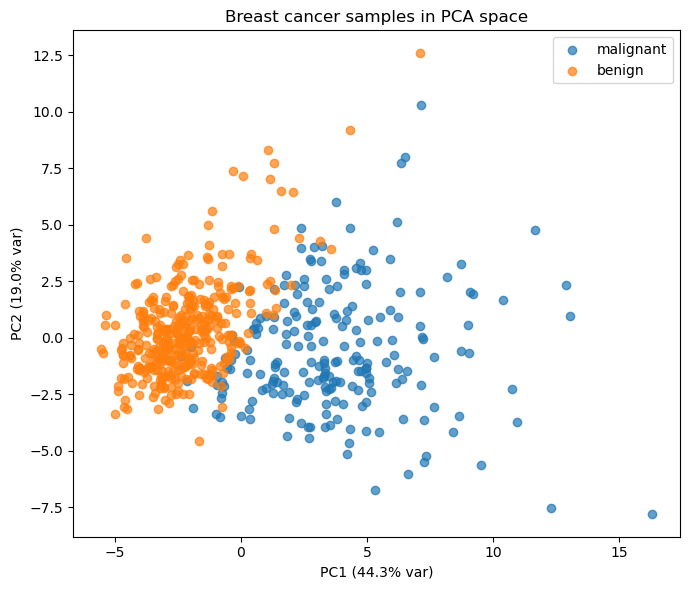

In [12]:
# 5. Fit 2 component PCA for visualization
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

pc1_var = pca_2d.explained_variance_ratio_[0]
pc2_var = pca_2d.explained_variance_ratio_[1]
# 6. 2D scatter plot of PC1 vs PC2
plt.figure(figsize=(7, 6))
labels = y.unique()

for label in labels:
    mask = (y == label).values
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        alpha=0.7,
        label=label
    )

plt.xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
plt.ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
plt.title("Breast cancer samples in PCA space")
plt.legend()
plt.tight_layout()
plt.show()

The plot shows how each tumor sample projects onto the first two principal components. These two axes capture about 63 percent of all variance in the dataset.

There is a clear but not perfect separation, and we can see that benign samples are more compactly grouped in this two dimensional space, as malignant samples are spread more widely which can reflect greater heterogeneity in malignant morphology.

PC1 is the primary axis. Higher PC1 values may help to identify more malignant cases.  


In [13]:
# 7. Inspect loadings for PC1 and PC2
loadings = pd.DataFrame(
    pca_2d.components_.T,
    index=feature_names,
    columns=["PC1", "PC2"]
)

loadings["abs_PC1"] = loadings["PC1"].abs()
loadings["abs_PC2"] = loadings["PC2"].abs()

top_k = 10
top_pc1 = loadings.sort_values("abs_PC1", ascending=False).head(top_k)
top_pc2 = loadings.sort_values("abs_PC2", ascending=False).head(top_k)

print("\nTop features contributing to PC1:")
print(top_pc1[["PC1"]])

print("\nTop features contributing to PC2:")
print(top_pc2[["PC2"]])



Top features contributing to PC1:
                           PC1
mean concave points   0.260854
mean concavity        0.258400
worst concave points  0.250886
mean compactness      0.239285
worst perimeter       0.236640
worst concavity       0.228768
worst radius          0.227997
mean perimeter        0.227537
worst area            0.224871
mean area             0.220995

Top features contributing to PC2:
                              PC2
mean fractal dimension   0.366575
fractal dimension error  0.280092
worst fractal dimension  0.275339
mean radius             -0.233857
compactness error        0.232716
mean area               -0.231077
worst radius            -0.219866
worst area              -0.219352
mean perimeter          -0.215181
smoothness error         0.204430


PC1 captures rather how big and irregular the tumor is, whereas PC2 captures rather fine scale morphology.

PCA helps to identify which morphological patterns matter most for distinguishing tumor types, but also atypical cases if we observe outliers.
Such insights can guide feature selection, domain research, or targeted clinical hypotheses.

PCA reduces high dimensionality, so it can be used for preprocessing for clustering or unsupervised learning and other more advanced modelling techniques.